# Data Analysis on ODI Cricket World Cup

The Cricket World Cup is the international championship of One Day International (ODI) cricket. The event is organised by the sport's governing body, the International Cricket Council (ICC), every four years, with preliminary qualification rounds leading up to a finals tournament. The tournament is one of the world's most viewed sporting events and is considered the "flagship event of the international cricket calendar" by the ICC.

reference : https://en.wikipedia.org/wiki/Cricket_World_Cup

This project performs deep analysis on the games played during all the world cup series. **The data covers 12 seasons and includes batting performance data**. The dataset is from http://www.howstat.com/cricket/home.asp.

The notebook answers the follwing questions:

1. Which Team is the most successful in the World Cup series?
2. Does winning the toss increases the chance of winning the game?
3. Winning Percentage of most recurred teams?
4. Number of matches occured in each city on 2019 world cup?
5. Wins by runs and wins by wickets - England's Performance
6. How many runs are scored by Australia and England in all the world cup series?

The project is divided into five sections:

-  Section 1:**Web scraping using bs4 and requests**
-  Section 2:**Data preparation and cleaning**
-  Section 3:**Exploratory data analysis and questions**
-  Section 4:**Summary**
-  Section 5:**Conclusion**


In [ ]:
#python version used
!python --version

List of libraries used on the project. Some of these libraries are present in either the standard library or most scientific distributions of Python. Of course, all of them can be installed with pip. A quick outline:

- `time` - Python standard library used for time related system calls.
- `collections` - Python standard library used for OrderedDict and Counter.
- `requests` is a library allows you to send HTTP requests.
- `bs4` is a library for retrieve data out of HTML and XML files.
- `numpy` is a library used for working with arrays.
- `pandas` is a library used for data manipulation and analysis.
- `matplotlib` is a plotting library.
- `seaborn` is a library based on matplotlib.
- `re` - Python standard library used to check matching pattern in a string.




In [2]:
#required libraries
import time
from collections import OrderedDict, Counter
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
import seaborn as sns
import re

## Section 1: Web Scraping using bs4 and requests

This section explains how and where the data have been scraped from. I have obtained data from the site http://www.howstat.com/cricket/home.asp.
Furthermore, the section is divided into two subsections:
- Scraping games data
 - Scraping scorecard urls
 - Scraping scorecard results
 
- Scraping batsmen data

### 1.1 Scraping games data

The main objective of this section is to explore how the games data have been fetched from the site mentioned above. The section is further sub divided into scraping scorecard urls and scraping scorecard results. In particular, the former one refers to scraping urls and storing it in the list `game_urls`. The latter one is about using the urls in `game_urls` list and fetch result data for each game. Finally, data is stored in a csv file named as `games.csv`. 


#### 1.1.1 Scraping scorecard urls

I have manually obtained the urls for each year and stored in the dctionary as `year_urls`. Each url contains the href links which are used to scrape scorecard results. Additionally, we will also retrieve the name of teams competing in each game.

In [7]:
#Each url contains the scorecard data
year_urls = {1975:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1975060719750621&Range=1975%20World%20Cup",
       1979:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1979060919790623&Range=1979%20World%20Cup",
       1983:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1983050119830630&Range=1983%20World%20Cup",
       1987:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1987100119871108&Range=1987-1988%20World%20Cup",
       1992:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1992022219920331&Range=1992%20World%20Cup",
       1996:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1996020119960317&Range=1996%20World%20Cup",
       1999:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1999050119990630&Range=1999%20World%20Cup",
       2003:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2003020920030323&Range=2003%20World%20Cup",
       2007:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2007031320070428&Range=2007%20World%20Cup",
       2011:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2011021920110402&Range=2011%20World%20Cup",
       2015:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2015021420150329&Range=2014-2015%20World%20Cup",
       2019:"http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2019053020190714&Range=2019%20World%20Cup"}

#list of year_urls
year_urls_lst = ["http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1975060719750621&Range=1975%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1979060919790623&Range=1979%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1983050119830630&Range=1983%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1987100119871108&Range=1987-1988%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1992022219920331&Range=1992%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1996020119960317&Range=1996%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=1999050119990630&Range=1999%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2003020920030323&Range=2003%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2007031320070428&Range=2007%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2011021920110402&Range=2011%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2015021420150329&Range=2014-2015%20World%20Cup",
       "http://www.howstat.com/cricket/Statistics/Matches/MatchList_ODI.asp?Group=2019053020190714&Range=2019%20World%20Cup"]

years = [1975, 1979, 1983, 1987, 1992, 1996, 1999, 2003, 2007, 2011, 2015, 2019]

In [3]:
#Initialize to store games data
worldcup_game_results = OrderedDict()

The **retrieve_urls function** is used to get the data of scorecard urls and name of competing teams. The function takes url in `year_urls_lst` as an argument. <br> 
Note: We wait 3 seconds between each call to prevent the webserver from kicking us out as an unpolite crawler.

In [4]:
def retrieve_urls(url):
    """Function that retrieves the scorecard urls and name of teams each other"""
    
    #retrieve page source
    html_content = requests.get(url)
    # wait for three seconds
    time.sleep(3)
    #retrieving html content 
    soup = BeautifulSoup(html_content.text, "html")
    #locating table which contains the scorecard urls and name of teams
    table = soup.find("table", attrs = {"class": "TableLined"})
    #list of tr tags (rows)
    table_rows = table.find_all("tr")

    #the first row is the headers, so we can ignore that
    #looping over all the rows
    for tr in table_rows[1:]:
        #list of td tags (columns)
        table_columns = tr.find_all("td")
        #data of two competing teams can be found in table_columns[2]
        table_column_teams = table_columns[2]
        #scorecard urls in table_columns[5]
        table_column_href = table_columns[5]
        #name of teams text
        column_teams = table_column_teams.find_all('a')
        #get scorecard href links
        column_href = table_column_href.find_all('a', href=True)
        
        #looping over t_url
        for a in column_href:
            global game_urls
            #appending scorecard urls
            game_urls.append(a['href'])
        #looping over u_versus
        for teamdata in column_teams:
            global versus
            #appending teams name
            team.append(teamdata.text.strip())

            
#list of name of teams
team = list()
#list of scorecard urls
game_urls = list()
        
#looping thorough url in year_urls_lst        
for url in year_urls_lst:
    #execute the function
    retrieve_urls(url)

#update dictionary with team list
worldcup_game_results["Team"] = team


Now, we have the links for each scorecard and we need to scrape scorecard results. The **retrieve_match_results function** is used to scrape scorecard results and later stored them in worldcup_game_results dictionary.

#### 1.1.2 Scraping scorecard results

In [6]:
def retrieve_match_results(url):
    """Function that retrieves the scorecard results"""
    
    
    base_url = "http://www.howstat.com/cricket/Statistics/Matches/"
    urll = base_url + url

    html_content = requests.get(urll)
    time.sleep(3)
    soup = BeautifulSoup(html_content.text, "html")
    #find all the table tag in the page
    tables = soup.findAll('table')
    # scorecard results
    #get x[5] to get scorecard results
    #list of tr rows
    rows_5 = tables[5].find_all("tr")
    #convert to list
    rows_5_lst = list(rows_5) 
    #we need rows from 1-7, starting at 0
    rows = rows_5_lst[1:7]
    
    #label "yes" or "no" to identity whether the game is final or not
    # get x[4] to get final
    row_final = tables[4].find_all("tr")[1]
    column_final = row_final.find_all("td")[0].text
    #if condition : "Yes" if it was final game of that series
    if "(Final)" in column_final:
        global final
        #appending final 
        final.append("Yes")
    else:
        #else: "No" if it was not final, appending final
        final.append("No")
        
    #looping over row
    for row in rows:
        #retrieve data from column 1
        column = row.find_all("td")[1]
        #date data
        if rows.index(row) == 0:
            global date
            date.append(column.text.strip())
        #venue data
        elif rows.index(row) == 1:
            global venue
            venue.append(column.text.strip())
        #conditions data
        elif rows.index(row) == 2:
            global conditions
            conditions.append(column.text.strip())
        #toss data
        elif rows.index(row) == 3:
            global toss
            toss.append(column.text.strip())
        #match result data
        elif rows.index(row) == 4:
            global match_result
            match_result.append(column.text.strip())
        #player of the match data
        elif rows.index(row) == 5:
            global player_of_the_match
            player_of_the_match.append(column.text.strip())
            
        
            
final = [] #store final information
date = [] #date 
venue = [] #city where the game was
conditions = [] #50 overs or 60 overs
toss = [] #who won the toss
match_result = [] #who won the game
player_of_the_match = [] #player of the match

#looping over game_urls list
for url in game_urls:
    retrieve_match_results(url)

"""updating worldcup_game_results dictionary"""

worldcup_game_results["Final"] = final
worldcup_game_results["Date"] = date
worldcup_game_results["Venue"] = venue
worldcup_game_results["Conditions"] = conditions
worldcup_game_results["Toss_winner"] = toss
worldcup_game_results["Match_won"] = match_result
worldcup_game_results["Player_of_the_match"] = player_of_the_match

Good. We have obtained the necessary data to analyse game results. The data is little messy and some columns are not required for our final goals. In the next section, we will cover data cleaning steps. For the time being, we will convert to DataFrame datatype and rearrange all the columns to make our analyzing process as clear as we can. 

In [8]:
#express as dataframe and name it as worldcup_game_df
worldcup_game_df = pd.DataFrame(worldcup_game_results)

In [9]:
#rearranging columns
worldcup_game_df = worldcup_game_df[["Date", "Conditions", "Venue", "Final", "Team", "Toss_winner", "Match_won", "Player_of_the_match"]]

In [11]:
#check if there are any null values
worldcup_game_df.isnull().any()

Date                   False
Conditions             False
Venue                  False
Final                  False
Team                   False
Toss_winner            False
Match_won              False
Player_of_the_match    False
dtype: bool

I would like to mention that this data has some impurities. I mean, seven rows are present in the data which are not part of any world cup series. These false rows are presented in the website and not because of my scraping technique. So, I had to manually check official cricket website to spot the false data and delete them. <br>
The data in the indexes - `123, 139, 431, 434, 447, 451 and 456` are unwanted.


In [12]:
#delete unwanted rows
worldcup_game_df.drop([123, 139, 431, 434, 447, 451, 456], inplace = True) 

In [13]:
#new (rows, columns)
worldcup_game_df.shape

(453, 8)

In [ ]:
#save dataframe as games.csv
#worldcup_game_df.to_csv("games.csv", index=False)

- ### Where does the data come from?
Games data are scrapped from the site http://www.howstat.com/cricket/home.asp. year_urls_lst list contains element which have all the data we are looking for.
- ### How data is scrapped?
The **scorecard urls** are retrieved using **retrieve_urls function** and stored data in the **game_urls list**. The **scorecard results** are extracted using urls in the game_urls list using **retrieve_matches_result function** and stored to **worldcup_game_results dictionary**. Saved as DataFrame and later as csv file named `games.csv`.
- ### What are the variables of interest?
The variables of interest are **Date, Venue, Final, Team, Toss_winner, Match_won and Player_of_the_match**. The Conditions column is not required.


In the next subsection, we will extract the batsmen data from the same site. <br>

### 1.2 Scraping batsmen data

The **retrieve_bat_data function** is used to fetch batsmen data.

In [14]:
def retrieve_bat_data():
    """Function that retrieve batsmen data"""
    
    #store batsmen data
    result = []
    #match code
    match_codes = ["0203", "0216", "0242", "0286", "0336", "0393", "0459","0535", "0642", "0779", "0885", "1009"]
    years = [1975, 1979, 1983, 1987, 1992, 1996, 1999, 2003, 2007, 2011, 2015, 2019]
    
    #looping over match_codes and years
    for code, year in zip(match_codes, years):
        url = "http://www.howstat.com/cricket/Statistics/Series/SeriesAnalysis_ODI.asp?SeriesCode=" + code
        page_source = requests.get(url)
        time.sleep(3)
        soup = BeautifulSoup(page_source.text, "html")
        #locate the table
        table = soup.find("table", attrs = {"class": "TableLined"})
        #get tr tags
        table_rows = table.find_all("tr")[1:]
        
        #looping over tr tags
        for tr in table_rows[1:]:
            #store data of single row
            data = []
            data.append(year)
            #looping over td tags
            for td in tr.find_all("td"):
                data.append(td.text.strip())
            result.append(data)
        
    return result

       

In [15]:
#store data in bat_data variable
bat_data = retrieve_bat_data()

In [16]:
#header for batsmen data
bat_columns = ["Year", "Player", "Country", "Matches", "Innings", "Not_out",
          "50s", "100s", "0s", "Highest_score", "Runs", "Strike_rate",
          "Average", "Catches", "Stumping", "% of Team"]
bat_data_df = pd.DataFrame(bat_data, columns = bat_columns)

In [18]:
bat_data_df.isnull().any()

Year             False
Player           False
Country          False
Matches          False
Innings          False
Not_out          False
50s              False
100s             False
0s               False
Highest_score    False
Runs             False
Strike_rate      False
Average          False
Catches          False
Stumping         False
% of Team        False
dtype: bool

**There are some missing values in the % of Team column**.

In [ ]:
#save bat_data_df dataframe as batsmen.csv file
#bat_data_df.to_csv("batsmen.csv", index=False)

- ### Where does the data come from?
batsmen data are scrapped from the site http://www.howstat.com/cricket/home.asp. year_urls_lst list contains element which have all the data we are looking for.
- ### How data is scrapped?
The retrieve_bat_data function is used to fetch batsmen data and stored in bat_data_df as DataFrame object. Later, saved as csv file named `batsmen.csv`.
- ### What are the variables of interest?
The variables of interest are Year, Player, Country, Matches, Innings, 50s, 100s, 0s, Highest_score, Runs, Strike_rate. Other columns are not required.

## 2. Data preparation and cleaning

In this section, we will clean the data in the two csv files, `games.csv` and `batsmen.csv`. First, we will load `games.csv` file using pandas and store it as **games_df** DataFrame. 

In [19]:
#load games.csv
games_df = pd.read_csv("games.csv")

In [21]:
#any missing values in each column
games_df.isnull().any()

Date                   False
Conditions             False
Venue                  False
Final                  False
Team                   False
Toss_winner            False
Match_won              False
Player_of_the_match    False
dtype: bool

**No missing values in the columns**.

**I would like to parse year from Date column, remove Conditions column, split team into two columns, extract match won**

In [22]:
#parse year from date column
games_df["Year"] = games_df.Date.str[-4:]
#covert Year column to int dtype
games_df["Year"] = games_df["Year"].astype(int)

In [23]:
#remove Conditions column
del games_df["Conditions"]

In [24]:
#remove Date column
del games_df["Date"]

In [25]:
#split_team into Team_1 and Team_2
games_df[["Team_1", "Team_2"]] = games_df["Team"].str.split(" v. ", expand=True)

separate team from Match_won column. The general pattern is in the form of <br>
"`team_name` won by numeric (runs or wickets)". So, we will split the string using "won" as delimiter and take the first element.

In [26]:
#match_won
def won(row):
    """splitting string using won as delimiter on each row"""
    if "won" in row["Match_won"]:
        #won delimiter and take first element
        return row["Match_won"].split("won")[0].strip()
    else:
        return row["Match_won"]

In [27]:
#add Won column to games_df DataFrame
games_df["Won"] = games_df.apply(won, axis=1)

The result of a cricket match can be mainly stated in three ways:

- If the side batting last wins the match without losing all its wickets, the result shall be stated as a win by the number of wickets still then to fall. For example: in a single-innings match, if Team A bat first and make 200 runs, then Team B make 201 after losing four wickets out of ten, Team B is said to have "won by six wickets", regardless of how many batsmen Team A lost during their innings.
- If the side fielding last wins the match, the result shall be stated as a win by runs. For example: if Team A bat first and make 200 runs, but Team B make only 192, Team A is said to have "won by eight runs". Note: If the side batting last has lost all its wickets, but as the result of an award of 5 penalty runs at the end of the match has scored a total of runs in excess of the total scored by the opposing side, the result shall be stated as a win to that side by penalty runs.
- If all innings of both teams are completed (either because all batsmen have been dismissed or one/more innings are completed by way of a declaration) and the totals are exactly equal, the match is a "tie".

reference : https://www.quora.com/In-cricket-what-is-the-difference-between-winning-by-X-runs-and-winning-by-Z-wickets

In [28]:
#win_by_runs

def win_by_runs(row):
    """function used to collect data of which matches were won by runs"""
    
    if "runs" in row["Match_won"] or "run" in row["Match_won"]:
        num = re.findall("\d+", row["Match_won"])[0]
        return int(num)
    else:
        return 0
        
#win_by_wickets

def win_by_wickets(row):
    """function used to collect data of which matches were won by wikctets"""
    
    if "wickets" in row["Match_won"] or "wicket" in row["Match_won"]:
        num = re.findall("\d+", row["Match_won"])[0]
        return int(num)
    else:
        return 0

In [29]:
#apply win_by_runs function
games_df["Win_by_runs"] = games_df.apply(win_by_runs, axis=1)

In [30]:
#apply win_by_wickets function
games_df["Win_by_wickets"] = games_df.apply(win_by_wickets, axis=1)

In [32]:
#extract city from Venue
games_df["City"] = games_df["Venue"].str.rsplit(", ").str[-1]

In [33]:
#no null value
games_df.isnull().any()

Venue                  False
Final                  False
Team                   False
Toss_winner            False
Match_won              False
Player_of_the_match    False
Year                   False
Team_1                 False
Team_2                 False
Won                    False
Win_by_runs            False
Win_by_wickets         False
City                   False
dtype: bool

In [34]:
#remove columns - Venue, Team
del games_df["Venue"]

In [35]:
#delete Team column
del games_df["Team"]

In [37]:
#rearranging columns
games_df = games_df[["Year", "City", "Final", "Team_1", "Team_2", "Toss_winner", "Match_won", "Won", "Win_by_runs", "Win_by_wickets", "Player_of_the_match"]]

In [ ]:
#games_df["Year"] = games_df["Year"].astype(int)

In [38]:
games_df.dtypes

Year                    int32
City                   object
Final                  object
Team_1                 object
Team_2                 object
Toss_winner            object
Match_won              object
Won                    object
Win_by_runs             int64
Win_by_wickets          int64
Player_of_the_match    object
dtype: object

In [ ]:
#save cleaned games csv as games_cleaned.csv
#games_df.to_csv("games_cleaned.csv", index=False)

In [ ]:
#load batsmen.csv and do some data cleaning

In [39]:
batsmen_df = pd.read_csv("batsmen.csv")

In [41]:
# some values are missing in % of Team column. Anyway we dont need that column. So I am going to missing values
batsmen_df.isnull().any()

Year             False
Player           False
Country          False
Matches          False
Innings          False
Not_out          False
50s              False
100s             False
0s               False
Highest_score    False
Runs             False
Strike_rate      False
Average          False
Catches          False
Stumping         False
% of Team         True
dtype: bool

In [42]:
#del % of Team
del batsmen_df["% of Team"]

In [43]:
# replace "-" with 0 in Strike_rate and Average columns
batsmen_df[['Strike_rate','Average']] = batsmen_df[['Strike_rate','Average']].replace('-', 0)

In [44]:
#convert Strike_rate and Average columns to float type
batsmen_df["Strike_rate"] = batsmen_df["Strike_rate"].astype(float)
batsmen_df["Average"] = batsmen_df["Average"].astype(float)

In [46]:
#remove * from Highest_score
batsmen_df['Highest_score'] = batsmen_df['Highest_score'].str.extract('(\d+)', expand=False)

In [47]:
#replace NaN by 0 in Highest_score column
batsmen_df = batsmen_df.replace(np.nan, 0)
#convert Highest_Score column to int
batsmen_df['Highest_score'] = batsmen_df['Highest_score'].astype(int)

In [49]:
#save cleaned batsmen.csv as batsmen_cleaned.csv
#batsmen_df.to_csv("batsmen_cleaned.csv", index=False)

## 3. Exploratory Data Analysis

The data has been cleaned and ready to be analyzed. In this section, we will look at the answers of the five questions mentioned at the start of this notebook. At the last cell of each question, you will be able to find what informations are extracted from each question. 

In [14]:
#open games_cleaned.csv and batsmen_cleaned.csv as games_cleaned_df and batsmen_cleaned_df respectively
games_cleaned_df = pd.read_csv("games_cleaned.csv")


In [15]:
batsmen_cleaned_df = pd.read_csv("batsmen_cleaned.csv")

In [17]:
games_cleaned_df.describe()

,Year,Win_by_runs,Win_by_wickets
count,453.000000,453.000000,453.000000
mean,2001.551876,41.549669,2.757174
std,12.234981,59.819162,3.453000
min,1975.000000,0.000000,0.000000
25%,1992.000000,0.000000,0.000000
50%,2003.000000,3.000000,0.000000
75%,2011.000000,73.000000,6.000000
max,2019.000000,275.000000,10.000000


In [18]:
#highest win_by_wickets
games_cleaned_df.loc[games_cleaned_df["Win_by_wickets"] == 10]
#highest_win_by_runs
games_cleaned_df.loc[games_cleaned_df["Win_by_runs"] == 275]

,Year,City,Final,Team_1,Team_2,Toss_winner,Match_won,Won,Win_by_runs,Win_by_wickets,Player_of_the_match
381,2015,Perth,No,Australia,Afghanistan,Afghanistan,Australia won by 275 runs,Australia,275,0,D A Warner


### Observations:
The following statements can be deduced from the **games_cleaned_df.describe()**:

- There have been total of **453 World cup games** hosted from 1975 to 2019.
- The biggest victory of the team batting first innings(Win_by_runs) is **Australia against Afghanistan** with the runs of **275**.
- The biggest victory for the team batting second innings(Win_by_wickets) is **10 wickets**.
- 75% of the winning teams that bat first innings won by a difference of **73 runs**.
- 75% of the winning teams that bat second innings won by a difference of **6 wickets**.

In [19]:
#no null value
games_cleaned_df.isnull().any()

Year                   False
City                   False
Final                  False
Team_1                 False
Team_2                 False
Toss_winner            False
Match_won              False
Won                    False
Win_by_runs            False
Win_by_wickets         False
Player_of_the_match    False
dtype: bool

### 1. Which Team is the most successful in the World Cup series?
To determine the successful team, I have filtered down on the list of teams that won in the final game of each series. The DataFrame successful_team_df gives the required information.

In [20]:
successful_team_df = games_cleaned_df.loc[(games_cleaned_df.Final == "Yes")][["Year", "Won"]]
successful_team = Counter(list(successful_team_df["Won"]))

In [21]:
successful_team_keys = list(successful_team.keys())
successful_team_values = list(successful_team.values())
successful_team_values_sum = sum(successful_team_values)

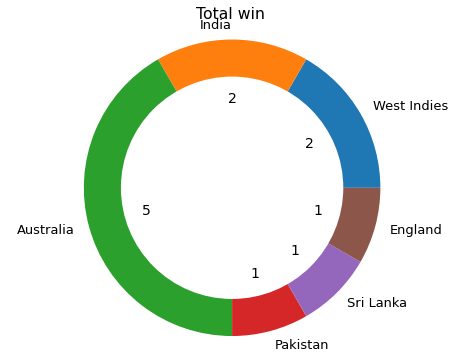

In [22]:
plt.pie(successful_team_values, labels = successful_team_keys,
        autopct = lambda x: '{:.0f}'.format(x*successful_team_values_sum/100))
plt.axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Total win')
plt.show()

### Observations:
- Australian Team has won five world cup series in total (1987, 1999, 2003, 2007 and 2015).
- This indicates the australian team have a great set of batsmen and bowlers. 

### 2. Does winning the toss increases the chance of winning the game?

In cricket, toss is a crucial factor as the team winning the ross have high chances of winning the game. Some games have been cancelled or stopped due to being interrupted by weather conditions or other factors. These conditions are given in the list. We will remove the games which satisfy one of the conditions from the list.

In [12]:
#conditions = ["Match tied", "Match tied [Duckworth-Lewis]", "Match abandoned", "No result"]

In [25]:
#remove cancelled games
mask = games_cleaned_df["Won"].isin(["Match tied", "Match tied [Duckworth-Lewis]", "Match abandoned", "No result"])
#games which actually took place
games_occured_df = games_cleaned_df[~mask]
#games "Yes" - both toss and game are won by the team, "No" - only won the toss but lost in the game
Counter(list(np.where((games_occured_df.Toss_winner == games_occured_df.Won), "Yes", "No")))

Counter({'Yes': 211, 'No': 226})

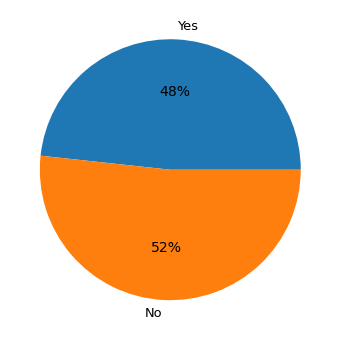

In [14]:
plt.pie([211,226], labels = ["Yes", "No"], autopct="%1.0f%%")
plt.show()

### Observations:
- But from the plot, we can conclude that winning the toss does not increase the probability of winning the game. We could say the game can go either way (almost equal chance).

### 3. Winning Percentage of most recurred teams?

Each season consists of old teams + new teams. I have decided to select a list of teams represented in all the worldcup series and called it as recurred teams. Once I have filtered the teams, it will interesting to see their contribution in each series.

In [15]:
years = [1975, 1979, 1983, 1987, 1992, 1996, 1999, 2003, 2007, 2011, 2015, 2019]

#1975
teams_1_1975 = set(games_occured_df.loc[games_occured_df["Year"]==1975]["Team_1"])
teams_2_1975 = set(games_occured_df.loc[games_occured_df["Year"]==1975]["Team_2"])
teams_union_1975 = teams_1_1975.union(teams_2_1975)
#1979
teams_1_1979 = set(games_occured_df.loc[games_occured_df["Year"]==1979]["Team_1"])
teams_2_1979 = set(games_occured_df.loc[games_occured_df["Year"]==1979]["Team_2"])
teams_union_1979 = teams_1_1979.union(teams_2_1979)

#common teams - teams appeard in all the worldcup games
common_teams = list(teams_union_1975.intersection(teams_union_1979))
common_teams

['Sri Lanka',
 'England',
 'West Indies',
 'New Zealand',
 'Australia',
 'Pakistan',
 'India']

In [16]:
#store the data wins by each common (recurred) teams
wins_by_teams = {'England':[],
                 'Australia':[],
                 'New Zealand':[],
                 'India':[],
                 'West Indies':[],
                 'Sri Lanka':[],
                 'Pakistan':[],}

wins_by_teams_keys = set(wins_by_teams.keys())

for year in years:
    wins = Counter(games_occured_df.loc[games_occured_df["Year"]==year]["Won"])
    wins_keys = set(wins.keys())
    difference = wins_by_teams_keys.difference(wins_keys)
    if len(difference) != 0:
        for team in difference:
            wins_by_teams[team].append(0)
    for team in wins:
        if team in wins_by_teams:
            wins_by_teams[team].append(wins[team])
        
    
wins_by_teams  

{'England': [3, 4, 5, 5, 6, 2, 3, 3, 5, 3, 2, 8],
 'Australia': [3, 1, 2, 7, 4, 5, 7, 11, 11, 4, 7, 7],
 'New Zealand': [2, 2, 3, 2, 7, 3, 4, 5, 7, 5, 8, 6],
 'India': [1, 0, 6, 5, 2, 4, 4, 9, 1, 7, 7, 7],
 'West Indies': [5, 4, 6, 3, 4, 3, 3, 3, 4, 3, 3, 2],
 'Sri Lanka': [0, 1, 1, 0, 2, 8, 2, 5, 8, 6, 4, 3],
 'Pakistan': [1, 2, 3, 5, 6, 4, 6, 2, 1, 6, 4, 5]}

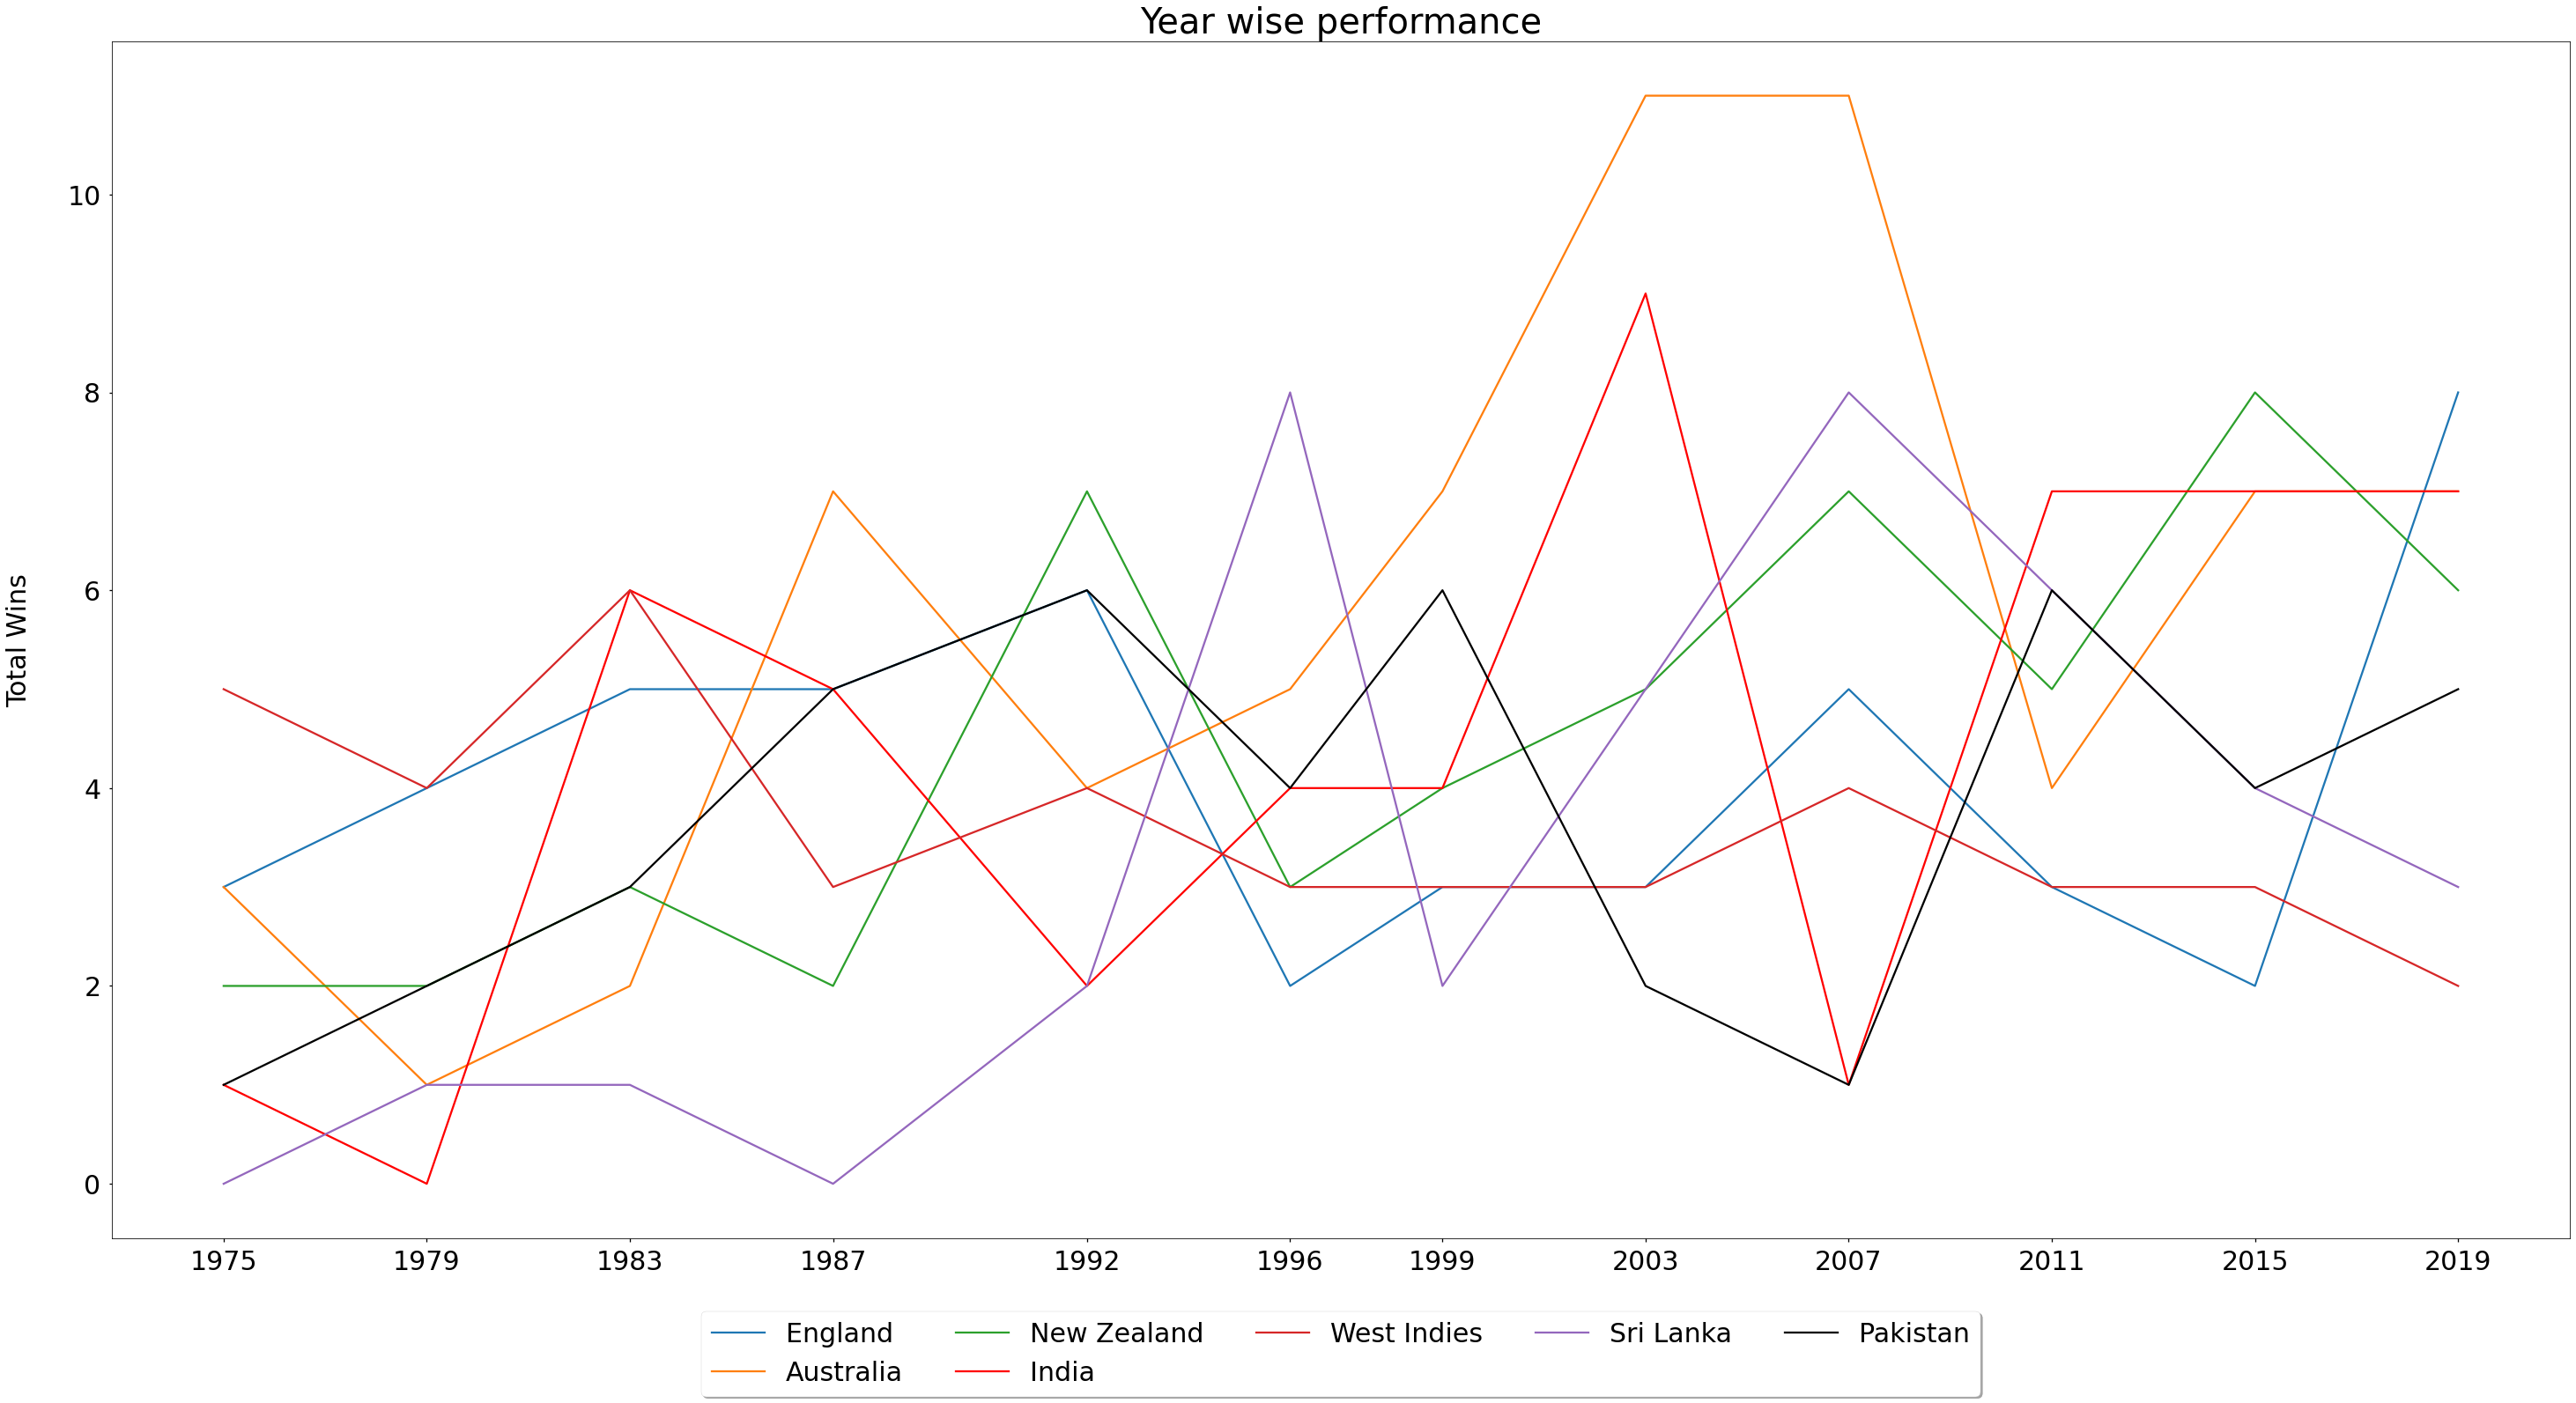

In [17]:
plt.figure(figsize=(50,25))
plt.title("Year wise performance", fontsize=40)
plt.plot(years, wins_by_teams['England'])
plt.plot(years, wins_by_teams['Australia'])
plt.plot(years, wins_by_teams['New Zealand'])
plt.plot(years, wins_by_teams['India'], color="red")
plt.plot(years, wins_by_teams['West Indies'])
plt.plot(years, wins_by_teams['Sri Lanka'])
plt.plot(years, wins_by_teams['Pakistan'], color="black")
plt.xticks(years, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Year', fontsize=30, labelpad=40)
plt.ylabel('Total Wins', fontsize=30, labelpad=40)
plt.legend(wins_by_teams.keys(), fontsize=30, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

### Observations:
- Australian and New Zealand teams were consistent through the years which represents that these two teams have some of the best players.
- Indian Team didnt win any games in 1979 and Sri lankan Team have zero wins in 1975 and 1987.
- West Indies Team's performance has dropped as the season goes. THis shows that west indies team doesnt have promosing batsmen in line.

### 4. Number of matches occured in each city on 2019 world cup?

The 2019 world cup was held in England and Wales. It would be interesting to see which city has represented the most matches (games).

In [20]:
#filter dataframe by 2019
games_2019_df = games_occured_df.loc[games_occured_df["Year"]==2019]
games_2019_city = Counter(games_2019_df["City"])

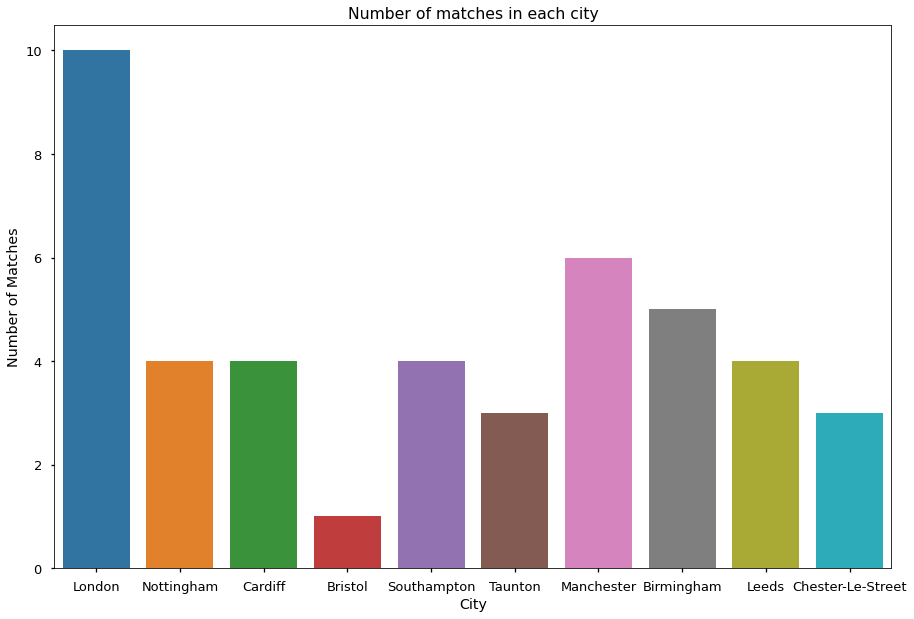

In [25]:
plt.figure(figsize=(15,10))
games_2019_city
sns.barplot(x = list(games_2019_city.keys()), y = list(games_2019_city.values()))
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.title("Number of matches in each city")
plt.show()

### Observations:
- It is clear that London has hosted more number of matches in 2019.
- Followed by Manchester and Birmingham. This shows that the most number of cricket fans are located in these three cities. 
- World cup series attracts population from around the world due to the popuplarity of the game. London is a tourist attraction and it has two of the most famous cricket grounds, Lord's Ground and The Oval. 

### 5. Wins by runs and wins by wickets - England's Performance

In a game, there are two innings: in the first innings, one of the two teams bats first while the other team bowls. In the second innings, the team who bat first bowls now and the other team bats. Here, we will analyze the wins by runs and wins by wickets of englands performance where we would be able to determine englands first choice, bat or bowl.

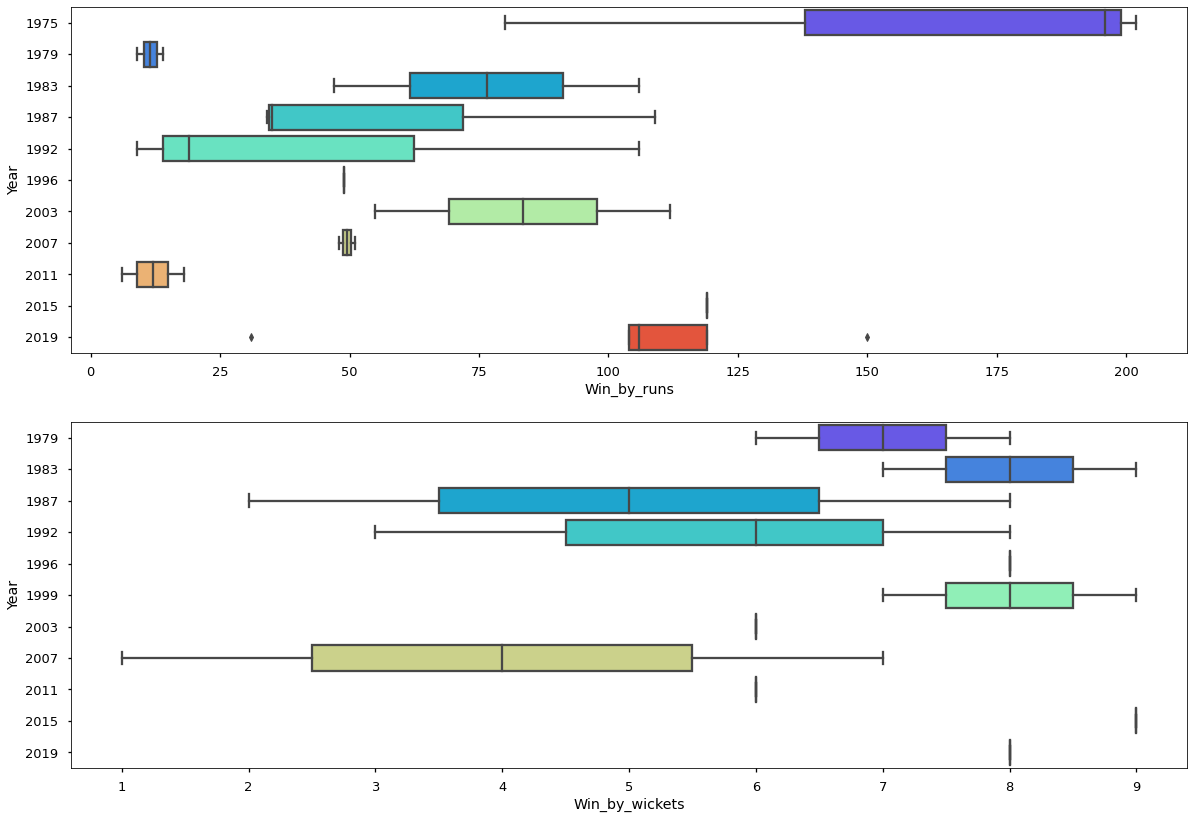

In [117]:
fig, axes = plt.subplots(2,1, figsize = (20,14))

sns.boxplot(ax = axes[1], data = games_occured_df[(games_occured_df['Win_by_wickets'] > 0) & (games_occured_df['Won'] == 'England')],
            y = 'Year', x = 'Win_by_wickets', orient = 'h', palette='rainbow')

sns.boxplot(ax = axes[0], data = games_occured_df[(games_occured_df['Win_by_runs'] > 0) & (games_occured_df['Won'] == 'England')],
            y = 'Year', x = 'Win_by_runs', orient = 'h', palette='rainbow')

plt.show()

### Observations:

- Obersavaions from plot of wins_by_runs:
 - 1996 and 2015 say that england first bat in all the games except two. This implies that england must have won most    of the toss in these series.
 - England's greatest performance with respect to the high margin of win_by_runs are in the 1975 and 1992. The team had a good bowling line in these years.
 - In 2019 world cup, the team was able to finish the game with the win difference between 100 and 125 runs.
 - 200 runs is the biggest margin of win by england till date.
- Observations from plot of wins_by_wickets:
 - In 1996, 2003 and 2019 england won one of the games with 9 wickets in their hands.
 - In 2007, the england has the lowest median wicket. In most of the matches, the game has lost more than half of batsmen.

In [69]:
batsmen_cleaned_df.describe()

,Year,Matches,Innings,Not_out,50s,100s,0s,Highest_score,Runs,Strike_rate,Average,Catches,Stumping
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000
mean,2000.394922,5.243112,4.173420,0.755808,0.498109,0.098865,0.377093,38.894111,94.106969,63.686867,21.450470,1.928147,0.076175
std,12.811404,2.601309,2.484692,0.959624,0.894652,0.375541,0.611948,36.725801,109.977351,35.000368,19.714034,2.477296,0.423792
min,1975.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000
25%,1992.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,13.000000,43.750000,5.750000,0.000000,0.000000
50%,2003.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,28.000000,53.000000,64.860000,16.750000,1.000000,0.000000
75%,2011.000000,7.000000,6.000000,1.000000,1.000000,0.000000,1.000000,60.000000,141.500000,83.385000,31.845000,3.000000,0.000000
max,2019.000000,11.000000,11.000000,5.000000,6.000000,5.000000,4.000000,237.000000,673.000000,233.330000,117.000000,21.000000,5.000000


In [49]:
#highest run in a series
#batsmen_cleaned_df.loc[batsmen_cleaned_df["Runs"] == 673]
#highest score in a game
#batsmen_cleaned_df.loc[batsmen_cleaned_df["Highest_score"] == 237]

### Observations:
The following statements can be deduced from the **batsmen_cleaned_df.describe()**:

- The average of 5 matches are placed by a player.
- The highest run scored by **Tendulkar** in **2003** world cup series with **673 runs**. 
- In **2019**, **Guptill** scored the highest individual with the runs of **237**.


In [71]:
batsmen_cleaned_df.dtypes

Year               int64
Player            object
Country           object
Matches            int64
Innings            int64
Not_out            int64
50s                int64
100s               int64
0s                 int64
Highest_score      int64
Runs               int64
Strike_rate      float64
Average          float64
Catches            int64
Stumping           int64
dtype: object

### 6. How many runs are scored by Australia and England in all the world cup series?

<Figure size 1800x1080 with 0 Axes>

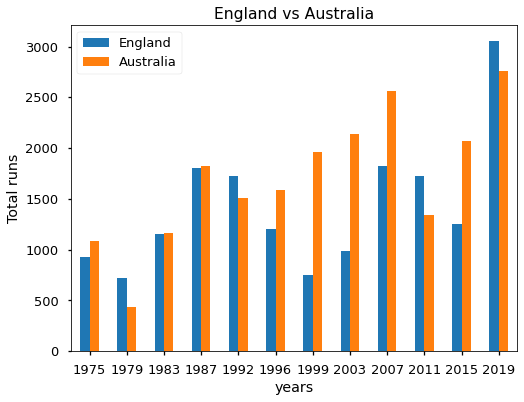

In [12]:
plt.figure(figsize=(25,15))
#store the total runs of both teams in each series
runs_eng_aus = {'England':[],
                 'Australia':[],}

runs_eng_aus_key = list(runs_eng_aus.keys())
runs_eng_df = batsmen_cleaned_df.loc[batsmen_cleaned_df["Country"]=="England"]
runs_aus_df = batsmen_cleaned_df.loc[batsmen_cleaned_df["Country"]=="Australia"]

for team in runs_eng_aus_key:
    for year in years:
        team_year_sum = batsmen_cleaned_df.loc[(batsmen_cleaned_df["Country"]==team) & (batsmen_cleaned_df["Year"]==year)]["Runs"].sum()
        runs_eng_aus[team].append(team_year_sum)
        
eng_aus_df = pd.DataFrame(runs_eng_aus, index = years)
ax = eng_aus_df.plot.bar(rot = 0, title="England vs Australia", xlabel = "years", ylabel = "Total runs")

### Observation:
From the above analysis, we can see that austrlia has dominated england in msot of the series. In 2019, England beat Austrlia in semi-final to get into final against New Zealand.

## Section 4: Summary

To summarize, we have scraped the data from the site, cleaned the data and answers six questions using graphical representations. List of things that I have learned from these datasets:
- There were a total of 453 games in total but 437 games are actually played. 16 games were cancelled due to rain.
- Australia have won five cups
- Winning a toss does not increase the chance of winning the match.
- Most number of matches happened in London during 2019 Worldcup series.
- Tendulkar holds the record of scoring highest total runs in 2003 Worldcup series. 

## Section 5: Conclusion

Cricket is a great sorts where a different factors that affect the outcome of the game. There can some interesting statistics operations can be done on the cricket data. In this project, I have only used games data and batsmen data. <br>

**Future scope** <br>
With more data such as bowlers performance and ballbyball data, we could be able to answer questions such as if the presence of certain players, boost the performance of the team.<br>
<br>
We can also answer question are bowlers successrate celebrated same as the batsmen
